# Лабораторна робота 2

### Завдання:

#### 1. Зниження розмірності і візуалізація даних
Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.

#### 2. Кластерний аналіз
1) За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.

#### 3. Обробка та класифікація текстових даних
Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. 


    Зниження розмірності і візуалізація даних:

In [40]:
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

# обробка даних у відовідності до лб 1
df = pd.read_csv("usp_drug_classification.csv")
df = df.dropna()

df_small = df[df['usp_category'].isin( df.usp_category.value_counts().keys()[:5])]

for col in df_small.columns:
    df_small.loc[:,col+"_num"] = (OrdinalEncoder().fit_transform(df_small[col].values.reshape(-1, 1))+1).astype("int")
df_small.head()

X = df_small[df_small.columns[8:]]
y = df_small['usp_category_num']

X = preprocessing.MinMaxScaler().fit_transform(X)

        PCA:

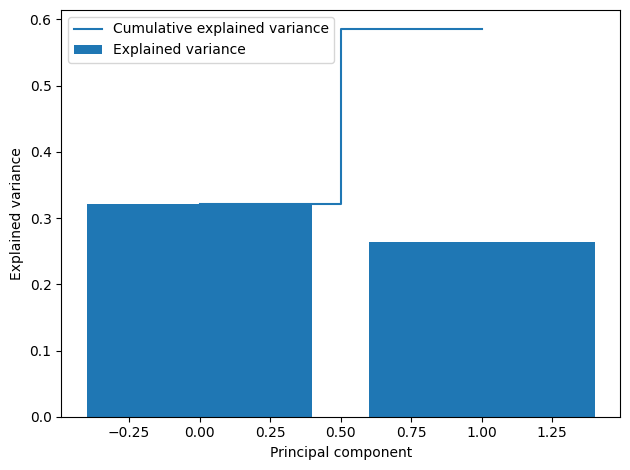

In [41]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

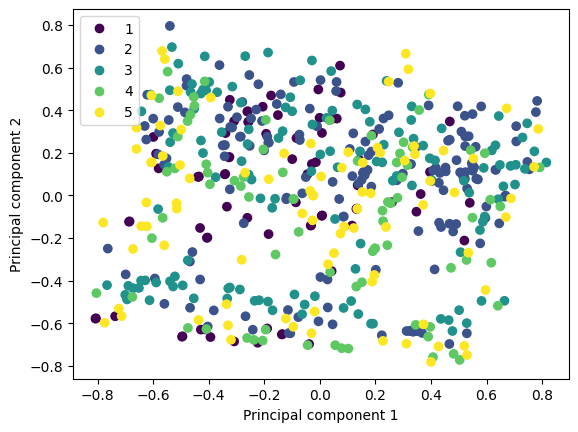

In [42]:
plot=plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(df_small['usp_category_num'].unique()))
plt.ylabel('Principal component 2')
plt.xlabel('Principal component 1')
plt.show()

        TSNE:

c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


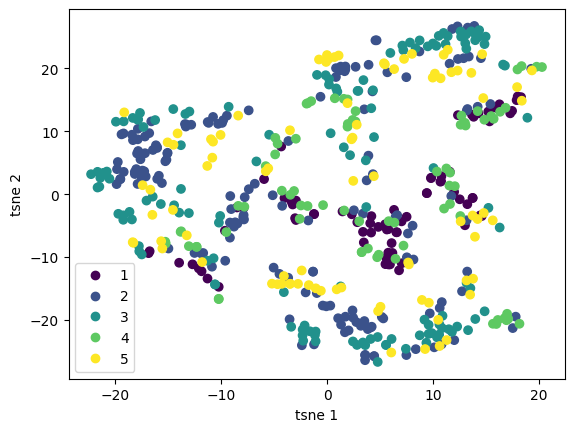

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

plot=plt.scatter(tsne_result_df['tsne_1'], tsne_result_df['tsne_2'], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(df_small['usp_category_num'].unique()))

plt.ylabel('tsne 2')
plt.xlabel('tsne 1')

plt.show()

    Кластерний аналіз:

In [44]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image

flower = load_sample_image("flower.jpg")
flower = np.array(flower, dtype=np.float64) / 255

Fitting model on a small sub-sample of the data
Predicting color indices on the full image (k-means)
Fitting model on a small sub-sample of the data
Predicting color indices on the full image (k-means)
Fitting model on a small sub-sample of the data
Predicting color indices on the full image (k-means)
Fitting model on a small sub-sample of the data
Predicting color indices on the full image (k-means)


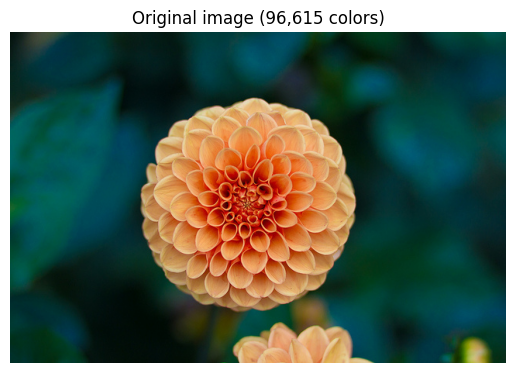

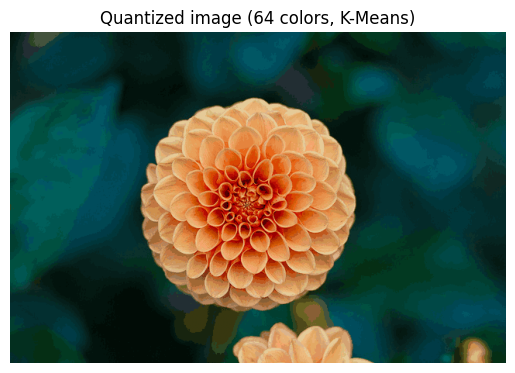

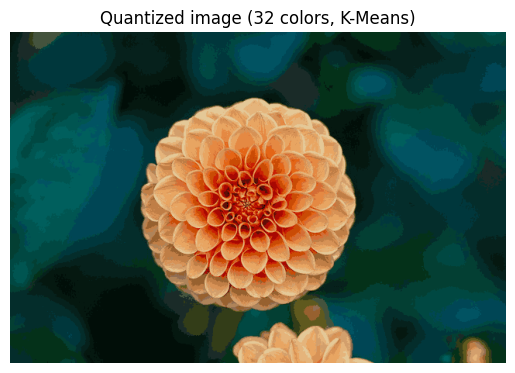

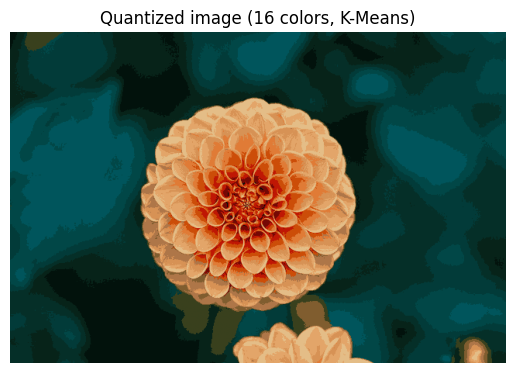

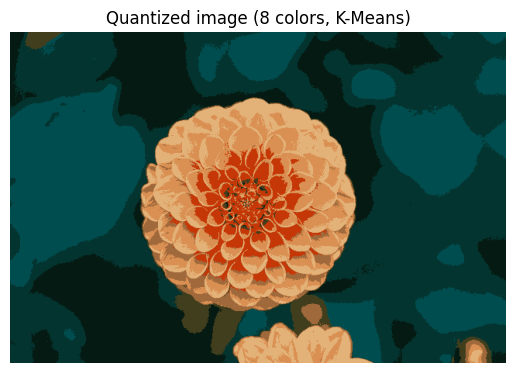

In [45]:
w, h, d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower, (w * h, d))

    
n_colors = [64,32,16,8]
counter = 1

plt.figure(counter)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(flower)
    
for color in n_colors:
    counter = counter + 1
    print("Fitting model on a small sub-sample of the data")
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=color, random_state=0).fit(
        image_array_sample
    )

    print("Predicting color indices on the full image (k-means)")
    labels = kmeans.predict(image_array)

    def recreate_image(codebook, labels, w, h):
        """Recreate the (compressed) image from the code book & labels"""
        return codebook[labels].reshape(w, h, -1)

    plt.figure(counter)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({color} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

    Обробка та класифікація текстових даних:

In [46]:
text = pd.read_csv("Emotion_classify_Data.csv")
text.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [47]:
text.Emotion.unique()

array(['fear', 'anger', 'joy'], dtype=object)

In [48]:
import spacy
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [49]:
nlp = spacy.load("en_core_web_lg") 

# кодування класів
text['emotion_encoded'] = text['Emotion'].map({'joy' : 0, 'fear': 1, 'anger': 2})

# токенізація
def preprocess_text(text):
    doc = nlp(text)
    words = []
    for w in doc:
        if w.is_stop or w.is_punct:
            continue
        words.append(w.lemma_)
    return " ".join(words) 
text['comment_preprocessed'] = text['Comment'].apply(preprocess_text)
text.head()

,Comment,Emotion,emotion_encoded,comment_preprocessed
0,i seriously hate one subject to death but now ...,fear,1,seriously hate subject death feel reluctant drop
1,im so full of life i feel appalled,anger,2,m life feel appalled
2,i sit here to write i start to dig out my feel...,fear,1,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,joy,0,ve angry r feel like idiot trust place
4,i feel suspicious if there is no one outside l...,fear,1,feel suspicious outside like rapture happen


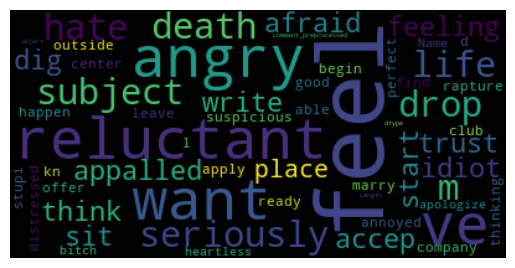

In [50]:
# wordcloud
from wordcloud import WordCloud 

wordcloud = WordCloud().generate(str(text['comment_preprocessed']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

# поділ даних на тренувальні та тестові
X = text['comment_preprocessed']
y = text['emotion_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()                          # векторизатор
X_train_vector= vectorizer.fit_transform(X_train)       # векторизуємо тренувальні дані
X_test_vector = vectorizer.transform(X_test)            # векторизуємо тестові дані

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

RF_cls = RandomForestClassifier().fit(X_train_vector,y_train)

y_pred = RF_cls.predict(X_test_vector)

In [54]:
print("Report: ", classification_report(y_test,y_pred))

Report:                precision    recall  f1-score   support

           0       0.91      0.95      0.93       605
           1       0.93      0.92      0.92       590
           2       0.93      0.90      0.92       587

    accuracy                           0.92      1782
   macro avg       0.92      0.92      0.92      1782
weighted avg       0.92      0.92      0.92      1782

